In [24]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [25]:
dataset = pandas.read_csv("heart.csv")
type(dataset)
dataset.shape
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [27]:

print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


1    165
0    138
Name: target, dtype: int64


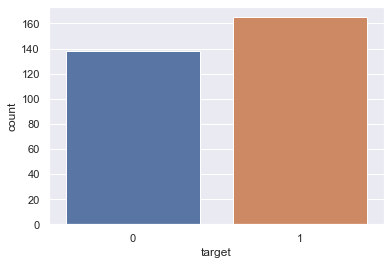

In [28]:
y = dataset["target"]
seaborn.countplot(y)
temp = dataset.target.value_counts()
print(temp)

<AxesSubplot:xlabel='sex', ylabel='target'>

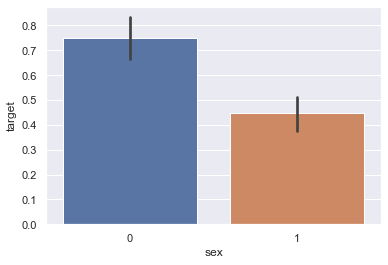

In [29]:
dataset["sex"].unique()
seaborn.barplot(dataset["sex"],y)

<AxesSubplot:xlabel='cp', ylabel='target'>

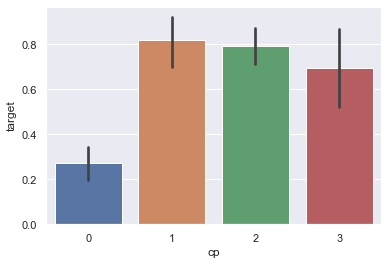

In [30]:
seaborn.barplot(dataset["cp"],y)


In [31]:
predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [32]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(242, 13) (61, 13) (242,) (61,)


In [33]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)
Y_pred_nb.shape

(61,)

In [34]:
nb_score = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("Accuracy: "+str(nb_score))

Accuracy: 85.25


<AxesSubplot:>

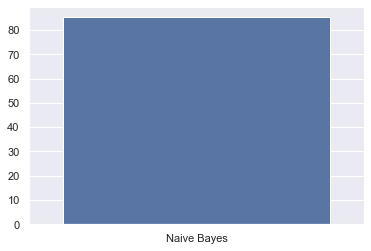

In [35]:
alg=["Naive Bayes"]
score = [nb_score]
sns.barplot(alg, score)

In [36]:
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)

In [37]:
svm_score = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("Accuracy: "+str(svm_score))

Accuracy: 81.97


<AxesSubplot:>

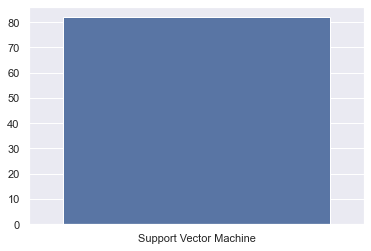

In [38]:
alg=["Support Vector Machine"]
score = [svm_score]
sns.barplot(alg, score)

In [39]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
knn_score = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("Accuracy: "+str(knn_score))

Accuracy: 67.21


<AxesSubplot:>

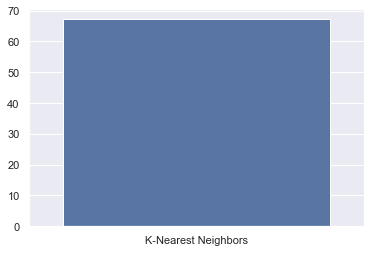

In [40]:
alg=["K-Nearest Neighbors"]
score = [knn_score]
sns.barplot(alg, score)

<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

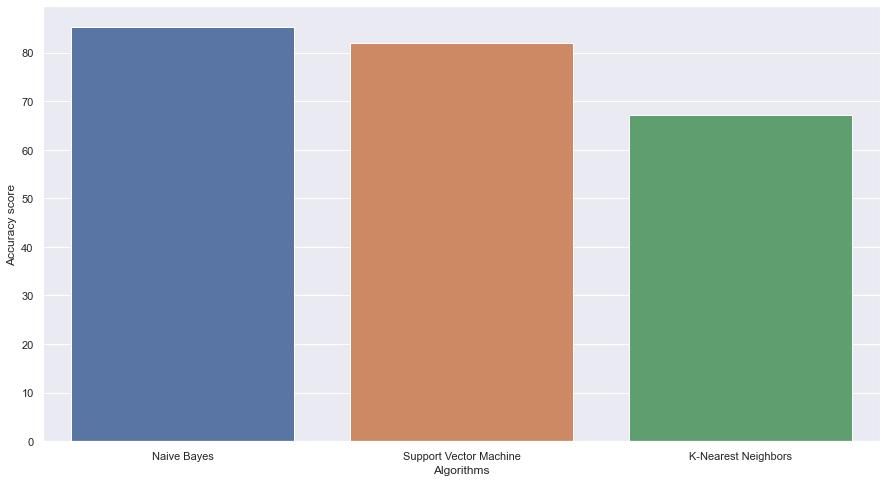

In [41]:
scores = [nb_score,svm_score,knn_score]
algorithms = ["Naive Bayes","Support Vector Machine","K-Nearest Neighbors"]  
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

seaborn.barplot(algorithms,scores)